### ZeroAccess

* Where ZeroAccess occurs? Any patterns?
* What kind of users are easily to be infected? Does education or income affect infection rate?
* Does UFO cause ZeroAccess infection?



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
z_df = pd.read_csv("https://drive.google.com/uc?id=1LRgxN2ArFB82VbqloPyXTKU37gxFM5Hx") # zeroaccess.csv
s_df = pd.read_csv("https://drive.google.com/uc?id=1PZgOIwkrISYp8r3xdA-DrWkyOx1TZgy_") # state-internets.csv
c_df = pd.read_csv("https://drive.google.com/uc?id=1PsrGcWk0v89Tce8W-LhwMGrdtbFzYeMT") # county-data.csv

In [0]:
print(z_df.shape, s_df.shape, c_df.shape)

(808446, 2) (49, 3) (3072, 6)


In [0]:
z_df.head()

,lat,long
0,-10.0000,-55.0000
1,38.0888,-78.5592
2,38.9990,-84.6266
3,48.6210,7.4944
4,43.2342,-86.2484


In [0]:
s_df.head()

,state,population,internet
0,Alabama,4758191,3092273
1,Arizona,6665093,5230474
2,Arkansas,2919815,1949869
3,California,37350092,29758896
4,Colorado,5077553,4058749


In [0]:
c_df.head()

,subregion,region,pop,income,ipaddr,ufo2010
0,abbeville,south carolina,25101,34670,30330,2
1,acadia,louisiana,61912,37970,38203,6
2,accomack,virginia,33341,41595,41338,2
3,ada,idaho,409061,55304,1035427,59
4,adair,iowa,7481,47623,3762,0


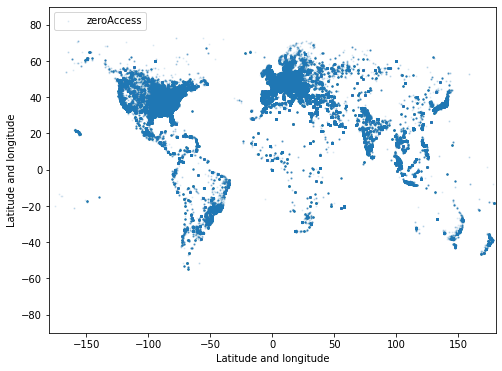

In [0]:
# plot zeroAccess infection instances on a earth map
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.scatter(z_df.long, z_df.lat, alpha = 0.1, s = 1, label = "zeroAccess")
ax.set_xlim((-180, 180))
ax.set_ylim((-90, 90))

plt.xlabel("Latitude and longitude")
plt.ylabel("Latitude and longitude")
plt.legend(loc='upper left')

plt.show()

In [0]:
import folium
from folium.plugins import HeatMap
mapa = folium.Map(location=(10, 10), zoom_start=1.5, tiles="Stamen Toner", height="50%", width="50%")
loc_li = list(zip(list(z_df.lat), (z_df.long)))[:10000] # <--- change data size
HeatMap(loc_li, radius=15).add_to(mapa) # <-----------------------change radius
mapa

### Reverse Geocoding



In [0]:
!pip install reverse_geocoder

In [0]:
import reverse_geocoder

# {'lat': '51.51116', 'lon': '-0.18426', 'name': 'Bayswater', 
#  'admin1': 'England', 'admin2': 'Greater London', 'cc': 'GB'}

# batch implementation
def rgr_batch(lat_long_df):
  cord_li = []
  for ind in lat_long_df.index:
    cord_li.append((lat_long_df['lat'][ind], lat_long_df['long'][ind]))
  result_dict_li = reverse_geocoder.search(cord_li)
  return pd.DataFrame(result_dict_li).drop(["lat", "lon"], axis = 1)

In [0]:
# batch implementation
sample_df = z_df.head(50000) # <------ only use some data, because it takes time
country_df = rgr_batch(sample_df)
df = sample_df.join(country_df).rename(columns={'name':'City', 'admin1': 'State', 'admin2':'County', 'cc':"country_code", })
df

Loading formatted geocoded file...


,lat,long,City,State,County,country_code
0,-10.0000,-55.0000,Alta Floresta,Mato Grosso,Alta Floresta,BR
1,38.0888,-78.5592,Charlottesville,Virginia,City of Charlottesville,US
2,38.9990,-84.6266,Florence,Kentucky,Boone County,US
3,48.6210,7.4944,Marlenheim,Alsace,Departement du Bas-Rhin,FR
4,43.2342,-86.2484,Muskegon,Michigan,Muskegon County,US
...,...,...,...,...,...,...
49995,53.1271,18.0200,Bydgoszcz,Kujawsko-Pomorskie,Bydgoszcz,PL
49996,42.6757,-82.7773,New Baltimore,Michigan,Macomb County,US
49997,43.5417,21.7078,Aleksinac,Central Serbia,Nisavski Okrug,RS
49998,28.2397,-82.7388,New Port Richey,Florida,Pasco County,US


### Question #1:
Plot a figure to show # of attack in each country

In [0]:
df.head()

,lat,long,City,State,County,country_code
0,-10.0000,-55.0000,Alta Floresta,Mato Grosso,Alta Floresta,BR
1,38.0888,-78.5592,Charlottesville,Virginia,City of Charlottesville,US
2,38.9990,-84.6266,Florence,Kentucky,Boone County,US
3,48.6210,7.4944,Marlenheim,Alsace,Departement du Bas-Rhin,FR
4,43.2342,-86.2484,Muskegon,Michigan,Muskegon County,US


In [0]:
num_of_attack = df["country_code"].value_counts() # 計算個數
df_num_of_attack = pd.DataFrame(num_of_attack) # 轉成 DataFrame
df_num_of_attack.columns = ["total_num"] # 改欄位名
print(df_num_of_attack)

    total_num
US      23987
CA       2966
GB       2564
JP       1504
AU       1501
..        ...
SO          1
KY          1
LI          1
GI          1
AI          1

[183 rows x 1 columns]


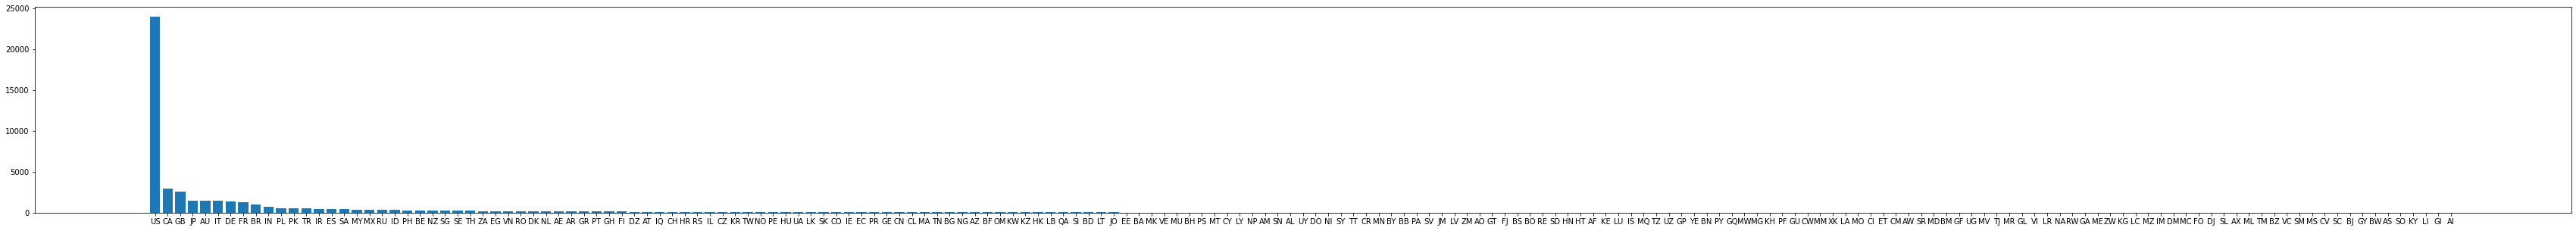

In [0]:
plt.figure(figsize=(60,5)) # 設置畫布大小
plt.bar(df_num_of_attack.index, df_num_of_attack.total_num) # draw bar chart
plt.show()

### Question #2:

Plot a figure to show % of attack in each country
Ignore countries that are < 1%

In [0]:
df_percent_of_attack = df_num_of_attack / df_num_of_attack.sum() # 轉為百分比
df_percent_of_attack = df_percent_of_attack[df_percent_of_attack["total_num"] >= 0.01] # 只保留 1% 以上的數據
print(df_percent_of_attack)

    total_num
US    0.47974
CA    0.05932
GB    0.05128
JP    0.03008
AU    0.03002
IT    0.02964
DE    0.02824
FR    0.02622
BR    0.01928
IN    0.01496
PL    0.01154
PK    0.01096
TR    0.01052


<BarContainer object of 13 artists>

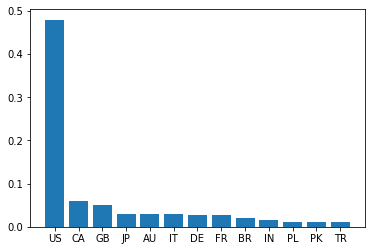

In [0]:
plt.bar(df_percent_of_attack.index, df_percent_of_attack.total_num)

### Question #3:

Only show US data and map.
Show US state data.

Which state/ciry has severe attack? Why?

Hint: recall a network tool named 'whois' ...


In [0]:
df_us = df[df["country_code"] == "US"]
df_us

,lat,long,City,State,County,country_code
1,38.0888,-78.5592,Charlottesville,Virginia,City of Charlottesville,US
2,38.9990,-84.6266,Florence,Kentucky,Boone County,US
4,43.2342,-86.2484,Muskegon,Michigan,Muskegon County,US
6,44.8012,-68.7778,Bangor,Maine,Penobscot County,US
8,36.0580,-88.8253,Bradford,Tennessee,Gibson County,US
...,...,...,...,...,...,...
49992,40.6374,-79.7264,Brackenridge,Pennsylvania,Allegheny County,US
49994,38.4380,-122.6753,Santa Rosa,California,Sonoma County,US
49996,42.6757,-82.7773,New Baltimore,Michigan,Macomb County,US
49998,28.2397,-82.7388,New Port Richey,Florida,Pasco County,US


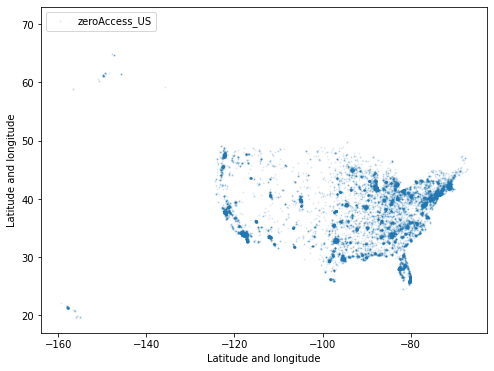

In [0]:
# plot zeroAccess infection instances on a earth map
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.scatter(df_us.long, df_us.lat, alpha = 0.1, s = 1, label = "zeroAccess_US")
# ax.set_xlim((-180, 180))
# ax.set_ylim((-90, 90))

plt.xlabel("Latitude and longitude")
plt.ylabel("Latitude and longitude")
plt.legend(loc='upper left')

plt.show()

In [0]:
# Attack number in each state
df_us["State"].value_counts()

California          2293
Texas               2003
Florida             1425
Kansas              1371
New York            1315
Pennsylvania         970
Illinois             948
Ohio                 914
Georgia              841
North Carolina       759
Michigan             715
New Jersey           669
Virginia             526
Arizona              503
Washington           502
Missouri             480
Wisconsin            472
Indiana              458
Massachusetts        453
Maryland             430
Tennessee            425
Alabama              412
Minnesota            405
Colorado             394
South Carolina       386
Kentucky             373
Louisiana            366
Oklahoma             293
Arkansas             262
Mississippi          241
Oregon               235
Iowa                 228
Connecticut          226
Nevada               187
Utah                 164
West Virginia        161
Nebraska             144
New Mexico           133
Maine                113
Idaho                 99


In [0]:
# Attack number in each city
df_us.groupby(by=["State", "City"]).size().sort_values(ascending=False)

State         City         
Kansas        Peabody          1152
Texas         Houston           238
California    Los Angeles       179
Illinois      Chicago           144
Arizona       Phoenix           142
                               ... 
Pennsylvania  Quarryville         1
              Radnor              1
Maryland      Hurlock             1
              Huntingtown         1
Mississippi   Ocean Springs       1
Length: 6660, dtype: int64

### Question #4:

Is there anything wrong with these states?

In [0]:
df_us_state = pd.DataFrame(df_us["State"].value_counts())
df_us_state.columns = ["attack"]
df_us_state["att_pc"] = df_us_state["attack"] / df_us_state["attack"].sum()
df_us_state

,attack,att_pc
California,2293,0.095593
Texas,2003,0.083504
Florida,1425,0.059407
Kansas,1371,0.057156
New York,1315,0.054821
Pennsylvania,970,0.040439
Illinois,948,0.039521
Ohio,914,0.038104
Georgia,841,0.035061
North Carolina,759,0.031642


In [0]:
# 發現遭受攻擊次數前五多的州，他們合計的受攻擊次數就佔了全美國的將近 1/3

### Question #5:

Are the attack occurances in each state related to state population?

Try a bar chart!

In [0]:
s_df["pop_pc"] = s_df["population"] / s_df["population"].sum()
s_df = s_df.set_index(s_df.state, drop=True)
s_df = s_df.drop(["state"], axis=1)
s_df.head()

,population,internet,pop_pc
state,,,
Alabama,4758191,3092273,0.015438
Arizona,6665093,5230474,0.021625
Arkansas,2919815,1949869,0.009473
California,37350092,29758896,0.121181
Colorado,5077553,4058749,0.016474


In [0]:
df_us_state.head()

,attack,att_pc
California,2293,0.095593
Texas,2003,0.083504
Florida,1425,0.059407
Kansas,1371,0.057156
New York,1315,0.054821


In [0]:
# Join two table
df_att_pop = pd.concat([s_df, df_us_state], axis=1, sort=True).sort_values(by=["att_pc"], ascending=False)
df_att_pop = df_att_pop.drop("District of Columbia")
df_att_pop

,population,internet,pop_pc,attack,att_pc
California,37350092.0,29758896.0,0.121181,2293.0,0.095593
Texas,25042738.0,17176661.0,0.081250,2003.0,0.083504
Florida,18732783.0,14764418.0,0.060778,1425.0,0.059407
Kansas,2848369.0,2248721.0,0.009241,1371.0,0.057156
New York,19746813.0,16091772.0,0.064068,1315.0,0.054821
Pennsylvania,12737230.0,9909482.0,0.041325,970.0,0.040439
Illinois,13046084.0,10243294.0,0.042327,948.0,0.039521
Ohio,11663946.0,8949773.0,0.037843,914.0,0.038104
Georgia,9932505.0,7597608.0,0.032226,841.0,0.035061
North Carolina,9479467.0,6809315.0,0.030756,759.0,0.031642


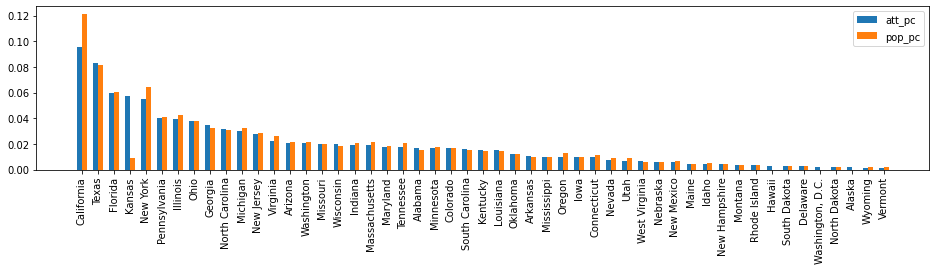

In [0]:
plt.figure(figsize=(16, 3))
index = np.arange(len(df_att_pop.index))
plt.bar(index, df_att_pop.att_pc, 0.3, label="att_pc")
plt.bar(index + 0.3, df_att_pop.pop_pc, 0.3, label="pop_pc")
plt.legend(loc="upper right")
plt.xticks(index+.3 / 2, df_att_pop.index, rotation=90)
plt.show()

In [0]:
# 發現對於大部分的 State，攻擊發生的次數與人口數有正相關的趨勢。
# 然而，Kansas 州卻是例外，因為他的人口數很少，但遭受的攻擊數量卻意外的很高！

### UFO?

Try to use county-data.csv data to predict the attack counts for each state by liner regression.

Which feature is the best?

In [0]:
c_df.head()

,subregion,region,pop,income,ipaddr,ufo2010
0,abbeville,south carolina,25101,34670,30330,2
1,acadia,louisiana,61912,37970,38203,6
2,accomack,virginia,33341,41595,41338,2
3,ada,idaho,409061,55304,1035427,59
4,adair,iowa,7481,47623,3762,0


In [0]:
# 分組
c_df = c_df.groupby(by=["region"]).sum()

In [0]:
c_df.head()

,pop,income,ipaddr,ufo2010
region,,,,
alabama,4822023,2522962,22542601,250
arizona,6532974,612727,62062174,1250
arkansas,2949131,2677866,4810526,265
california,38041430,3241756,156511903,3769
colorado,5129284,3206281,22787577,513


In [0]:
df_att_pop.head()

,population,internet,pop_pc,attack,att_pc
California,37350092.0,29758896.0,0.121181,2293.0,0.095593
Texas,25042738.0,17176661.0,0.081250,2003.0,0.083504
Florida,18732783.0,14764418.0,0.060778,1425.0,0.059407
Kansas,2848369.0,2248721.0,0.009241,1371.0,0.057156
New York,19746813.0,16091772.0,0.064068,1315.0,0.054821


In [0]:
# 轉小寫
df_att_pop.index = [x.lower() for x in df_att_pop.index]

In [0]:
# Join two table
df_pred = pd.concat([c_df, df_att_pop], axis=1, sort=True)
df_pred = df_pred[["pop", "income", "ipaddr", "ufo2010", "attack", "att_pc", "pop_pc"]]
df_pred = df_pred.dropna()
df_pred.head(50)

,pop,income,ipaddr,ufo2010,attack,att_pc,pop_pc
alabama,4822023.0,2522962.0,22542601.0,250.0,412.0,0.017176,0.015438
arizona,6532974.0,612727.0,62062174.0,1250.0,503.0,0.020970,0.021625
arkansas,2949131.0,2677866.0,4810526.0,265.0,262.0,0.010923,0.009473
california,38041430.0,3241756.0,156511903.0,3769.0,2293.0,0.095593,0.121181
colorado,5129284.0,3206281.0,22787577.0,513.0,394.0,0.016426,0.016474
connecticut,3590347.0,565060.0,40993589.0,280.0,226.0,0.009422,0.011535
delaware,917092.0,172156.0,19378182.0,74.0,68.0,0.002835,0.002902
florida,19317568.0,2990011.0,23716071.0,1465.0,1425.0,0.059407,0.060778
georgia,9919945.0,6433814.0,20947043.0,548.0,841.0,0.035061,0.032226
idaho,1595728.0,1904783.0,2148449.0,161.0,99.0,0.004127,0.005068


In [0]:
from sklearn.linear_model import LinearRegression

X_train = df_pred[["pop", "income", "ipaddr", "ufo2010"]]
y_train = df_pred[["attack"]]

model = LinearRegression()
model.fit(X_train, y_train)

# print with feature name
print("attack = ")
for c,f in zip(model.coef_.tolist()[0], ["pop", "income", "ipaddr", "ufo2010"]):
  print(" {0:+} * {1}".format(c, f))
print("", model.intercept_[0])

attack = 
 +6.111271668738548e-05 * pop
 +4.32120598873096e-05 * income
 +1.376059877774568e-07 * ipaddr
 -0.02640189801197513 * ufo2010
 -12.765104130708494


In [0]:
# 由結果可以推論，在這些變數中，人口數(pop)與收入(income)這兩個變數，與 attack 數量最有關聯。
# 而由模型參數可以推論，幽浮的數量與 attack 數量的關聯性非常低。

In [0]:
import statsmodels.api as sm
results = sm.OLS(y_train, X_train).fit()
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 attack   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              199.5
Date:                Fri, 20 Mar 2020   Prob (F-statistic):                    1.38e-27
Time:                        09:52:10   Log-Likelihood:                         -311.51
No. Observations:                  48   AIC:                                      631.0
Df Residuals:                      44   BIC:                                      638.5
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pop         6.162e-05   9.98e-06      6.175      0.000    4.15e-05    8.17e-05
income      4.028e-05    1.1e-05      3.657      0.001    1.81e-05    6.25e-05
ipaddr      1.216e-07   7.38e-07      0.165      0.870   -1.37e-06    1.61e-06
ufo2010       -0.0333      0.103     -0.324      0.748      -0.241       0.174
==============================================================================
Omnibus:                       93.113   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2205.804
Skew:                           5.363   Prob(JB):                         0.00
Kurtosis:                      34.430   Cond. No.                     2.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Additional Materials

### GeoPy

Realtime network-based query. 
May limit query frequency.

https://geopy.readthedocs.io/en/stable/

In [0]:
!pip install geopy

In [0]:
import geopy

locator = geopy.geocoders.Nominatim(user_agent="myGeocoder")
coordinates = "53.480837, -2.244914"
location = locator.reverse(coordinates)
location.raw

{'address': {'building': 'Eagle Insurance Buildings',
  'city': 'Manchester',
  'country': 'United Kingdom',
  'country_code': 'gb',
  'county': 'Greater Manchester',
  'house_number': '68',
  'neighbourhood': 'Chinatown',
  'postcode': 'M2 4JG',
  'road': 'Cross Street',
  'state': 'England',
  'state_district': 'North West England',
  'suburb': 'City Centre'},
 'boundingbox': ['53.480856', '53.4810634', '-2.2451761', '-2.2449576'],
 'display_name': 'Eagle Insurance Buildings, 68, Cross Street, Chinatown, City Centre, Manchester, Greater Manchester, North West England, England, M2 4JG, United Kingdom',
 'lat': '53.4809597',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'lon': '-2.2450668274629235',
 'osm_id': 37139875,
 'osm_type': 'way',
 'place_id': 96393663}

### Reverse Geocode

In [0]:
!pip install reverse-geocode

     |████████████████████████████████| 1.6MB 4.8MB/s 
  Created wheel for reverse-geocode: filename=reverse_geocode-1.4-cp36-none-any.whl size=1637799 sha256=d00eccdc2757d29e68c0ae0e9c53c3eed1ee479e6b555768d2298d2d246165e2
  Stored in directory: /root/.cache/pip/wheels/80/56/82/529b8b1d91c1ef49fe335d89d61bc4d244b6ed72c5063c55e9
Successfully built reverse-geocode


In [0]:
# need a package that can convert lat,long to contury code
# https://pypi.org/project/reverse-geocode/

import reverse_geocode

coordinates = [(51.5214588, -0.1729636)]
results = reverse_geocode.search(coordinates)

print(results[0])

{'country_code': 'GB', 'city': 'Bayswater', 'country': 'United Kingdom'}


### Reverse Geocoder

https://github.com/thampiman/reverse-geocoder


In [0]:
 !pip install reverse_geocoder

In [0]:
import reverse_geocoder

coordinates = [(51.5214588, -0.1729636)]
results = reverse_geocoder.search(coordinates) # default mode = 2

print(dict(results[0]))

{'lat': '51.51116', 'lon': '-0.18426', 'name': 'Bayswater', 'admin1': 'England', 'admin2': 'Greater London', 'cc': 'GB'}
